# Medical Classification Models Notebook
I'll create a step-by-step notebook with clear sections and explanations for building classification models using your medical datasets.

## Part 1: Introduction and Setup

This notebook demonstrates how to build classification models for medical diagnosis using various datasets. We'll compare TensorFlow neural networks with traditional machine learning approaches like Logistic Regression and Random Forest.

In [ ]:
%pip install matplotlib tensorflow seaborn pandas numpy scikit-learn 
# python kernel should be <3.11

Note: you may need to restart the kernel to use updated packages.


In [178]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.impute import SimpleImputer
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers
import pickle

# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Create directory for saving models
os.makedirs("models", exist_ok=True)

print("Setup complete! Let's start analyzing medical datasets.")

Setup complete! Let's start analyzing medical datasets.


## Part 2: Data Loading and Exploration
Let's start by loading and exploring our datasets to understand their structure.

In [179]:
# Function to display basic dataset information
def explore_dataset(df, dataset_name):
    """
    Displays basic information about a dataset
    
    Parameters:
    - df: Pandas DataFrame
    - dataset_name: Name of the dataset
    """
    print(f"\n{'='*50}")
    print(f"Exploring {dataset_name} Dataset")
    print(f"{'='*50}")
    
    print(f"\nShape: {df.shape}")
    print(f"\nFirst 5 rows:")
    display(df.head())
    
    print("\nData types:")
    display(df.dtypes)
    
    print("\nMissing values:")
    display(df.isnull().sum())
    
    print("\nBasic statistics:")
    display(df.describe())
    
    # Check target variable distribution
    if dataset_name == "Diabetes":
        target_col = "Outcome"
    elif dataset_name == "Heart Disease":
        target_col = "target"
    elif dataset_name == "Hypothyroid":
        target_col = "binaryClass"
    elif dataset_name == "Parkinson's":
        target_col = "status"
    else:  # Lung Cancer
        target_col = "LUNG_CANCER"
    
    print(f"\nTarget variable ({target_col}) distribution:")
    display(df[target_col].value_counts())
    
    # Visualize target distribution
    plt.figure(figsize=(6, 4))
    sns.countplot(x=df[target_col])
    plt.title(f"{dataset_name} - Target Distribution")
    plt.tight_layout()
    plt.show()

Load and Explore Diabetes Dataset


Loading Diabetes dataset...

Exploring Diabetes Dataset

Shape: (768, 9)

First 5 rows:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1



Data types:


Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


Missing values:


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


Basic statistics:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000



Target variable (Outcome) distribution:


Outcome
0    500
1    268
Name: count, dtype: int64

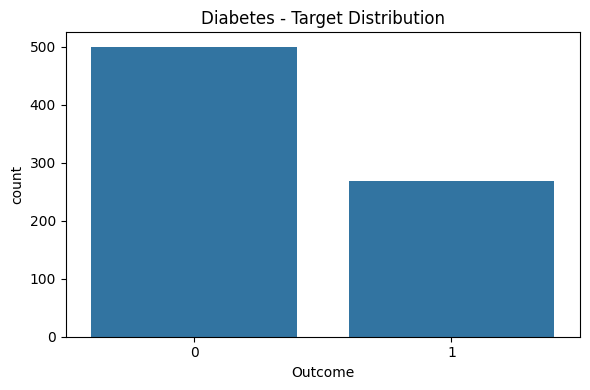

In [180]:
# Load Diabetes dataset
print("\nLoading Diabetes dataset...")
diabetes_df = pd.read_csv('datasets/diabetes_data.csv')
explore_dataset(diabetes_df, "Diabetes")

Load and Explore Heart Disease Dataset


Loading Heart Disease dataset...

Exploring Heart Disease Dataset

Shape: (303, 14)

First 5 rows:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1



Data types:


age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object


Missing values:


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


Basic statistics:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000



Target variable (target) distribution:


target
1    165
0    138
Name: count, dtype: int64

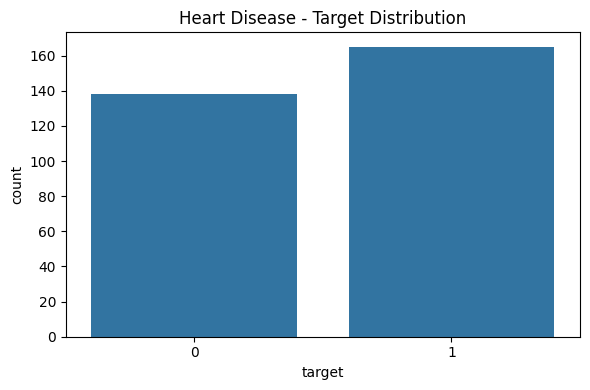

In [181]:
# Load Heart Disease dataset
print("\nLoading Heart Disease dataset...")
heart_df = pd.read_csv('datasets/heart_disease_data.csv')
explore_dataset(heart_df, "Heart Disease")

Load and Explore Hypothyroid Dataset


Loading Hypothyroid dataset...

Exploring Hypothyroid Dataset

Shape: (114, 30)

First 5 rows:


,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
0,41,F,f,f,f,f,f,f,f,f,...,t,125.0,t,1.14,t,109.0,f,NaN,SVHC,P
1,23,F,f,f,f,f,f,f,f,f,...,t,102.0,f,NaN,f,NaN,f,NaN,other,P
2,46,M,f,f,f,f,f,f,f,f,...,t,109.0,t,0.91,t,120.0,f,NaN,other,P
3,70,F,t,f,f,f,f,f,f,f,...,t,175.0,f,NaN,f,NaN,f,NaN,other,P
4,70,F,f,f,f,f,f,f,f,f,...,t,61.0,t,0.87,t,70.0,f,NaN,SVI,P



Data types:


age                            int64
sex                           object
on thyroxine                  object
query on thyroxine            object
on antithyroid medication     object
sick                          object
pregnant                      object
thyroid surgery               object
I131 treatment                object
query hypothyroid             object
query hyperthyroid            object
lithium                       object
goitre                        object
tumor                         object
hypopituitary                 object
psych                         object
TSH measured                  object
TSH                          float64
T3 measured                   object
T3                           float64
TT4 measured                  object
TT4                          float64
T4U measured                  object
T4U                          float64
FTI measured                  object
FTI                          float64
TBG measured                  object
T


Missing values:


age                            0
sex                           10
on thyroxine                   0
query on thyroxine             0
on antithyroid medication      0
sick                           0
pregnant                       0
thyroid surgery                0
I131 treatment                 0
query hypothyroid              0
query hyperthyroid             0
lithium                        0
goitre                         0
tumor                          0
hypopituitary                  0
psych                          0
TSH measured                   0
TSH                           14
T3 measured                    1
T3                            29
TT4 measured                   1
TT4                            7
T4U measured                   1
T4U                           10
FTI measured                   1
FTI                           10
TBG measured                   1
TBG                          114
referral source                1
binaryClass                    1
dtype: int


Basic statistics:


,age,TSH,T3,TT4,T4U,FTI,TBG
count,114.000000,100.000000,85.000000,107.000000,104.000000,104.000000,0.0
mean,55.175439,4.412900,1.957647,108.205607,0.983462,110.556731,NaN
std,18.791942,16.656517,0.758661,34.660275,0.208563,31.308669,NaN
min,18.000000,0.005000,0.300000,11.000000,0.530000,8.900000,NaN
25%,39.500000,0.377500,1.600000,86.000000,0.860000,92.000000,NaN
50%,59.000000,1.300000,1.900000,104.000000,0.940000,107.000000,NaN
75%,70.000000,2.650000,2.300000,125.500000,1.062500,129.250000,NaN
max,87.000000,160.000000,5.500000,237.000000,1.630000,203.000000,NaN



Target variable (binaryClass) distribution:


binaryClass
P    105
N      8
Name: count, dtype: int64

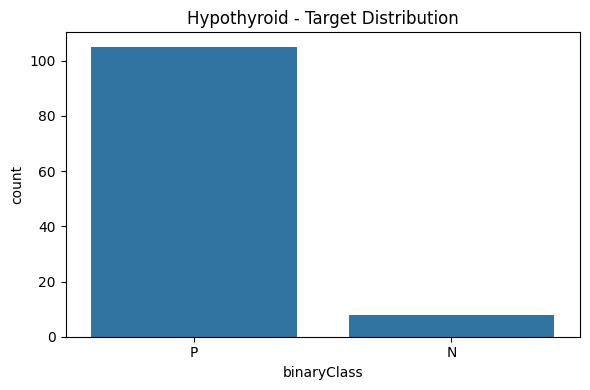

In [182]:
# Load Hypothyroid dataset
print("\nLoading Hypothyroid dataset...")
thyroid_df = pd.read_csv('datasets/hypothyroid.csv')
explore_dataset(thyroid_df, "Hypothyroid")

Load and Explore Parkinson's Dataset


Loading Parkinson's dataset...

Exploring Parkinson's Dataset

Shape: (195, 24)

First 5 rows:


,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335



Data types:


name                 object
MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
status                int64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object


Missing values:


name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64


Basic statistics:


,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367



Target variable (status) distribution:


status
1    147
0     48
Name: count, dtype: int64

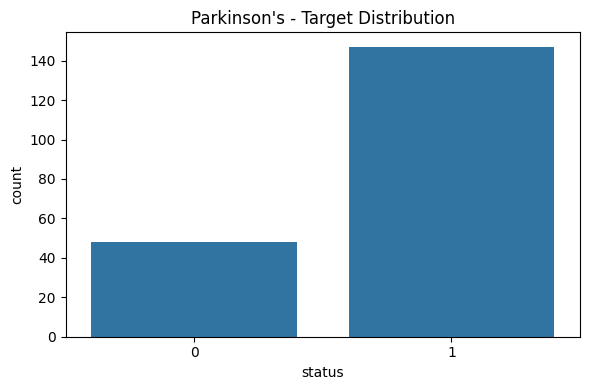

In [183]:
# Load Parkinson's dataset
print("\nLoading Parkinson's dataset...")
parkinson_df = pd.read_csv('datasets/parkinson_data.csv')
explore_dataset(parkinson_df, "Parkinson's")

Load and Explore Lung Cancer Dataset


Loading Lung Cancer dataset...

Exploring Lung Cancer Dataset

Shape: (309, 16)

First 5 rows:


,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO



Data types:


GENDER                   object
AGE                       int64
SMOKING                   int64
YELLOW_FINGERS            int64
ANXIETY                   int64
PEER_PRESSURE             int64
CHRONIC DISEASE           int64
FATIGUE                   int64
ALLERGY                   int64
WHEEZING                  int64
ALCOHOL CONSUMING         int64
COUGHING                  int64
SHORTNESS OF BREATH       int64
SWALLOWING DIFFICULTY     int64
CHEST PAIN                int64
LUNG_CANCER              object
dtype: object


Missing values:


GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64


Basic statistics:


,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000



Target variable (LUNG_CANCER) distribution:


LUNG_CANCER
YES    270
NO      39
Name: count, dtype: int64

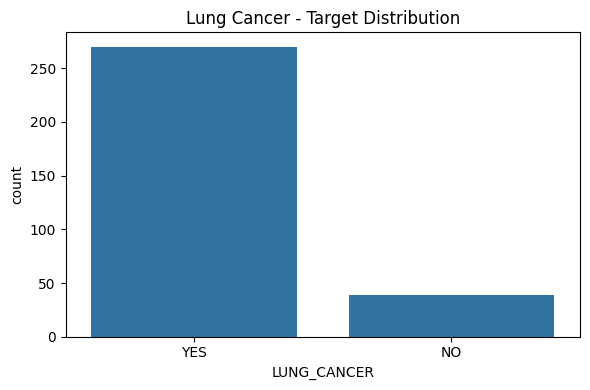

In [184]:
# Load Lung Cancer dataset
print("\nLoading Lung Cancer dataset...")
lung_df = pd.read_csv('datasets/survey lung cancer.csv')
explore_dataset(lung_df, "Lung Cancer")

## Part 3: Data Preprocessing Functions

Now we'll define functions to preprocess our data before feeding it to our models.

In [185]:
# Function to handle missing values
def handle_missing_values(X, strategy='mean'):
    """
    Imputes missing values in the data
    
    Parameters:
    - X: Feature matrix
    - strategy: Imputation strategy ('mean', 'median', 'most_frequent')
    
    Returns:
    - X_imputed: Imputed feature matrix
    """
    if isinstance(X, pd.DataFrame):
        # Make a copy to avoid modifying the original
        X_processed = X.copy()
        
        # First, replace any string NaN representations with np.nan
        X_processed = X_processed.replace(['?', 'NaN', 'NA', 'N/A', 'nan', ''], np.nan)
        
        # Convert columns with numeric data to float
        for col in X_processed.columns:
            if X_processed[col].dtype == object:
                try:
                    X_processed[col] = pd.to_numeric(X_processed[col], errors='coerce')
                except:
                    pass  # Keep as object type if conversion fails
        
        # Now get numeric and categorical columns
        num_cols = X_processed.select_dtypes(include=np.number).columns
        cat_cols = X_processed.select_dtypes(exclude=np.number).columns
        
        # Handle numeric columns
        if len(num_cols) > 0:
            num_imputer = SimpleImputer(strategy=strategy)
            X_numeric_imputed = pd.DataFrame(
                num_imputer.fit_transform(X_processed[num_cols]),
                columns=num_cols,
                index=X_processed.index
            )
            # Replace the columns one by one to avoid dimension mismatch
            for col in num_cols:
                X_processed[col] = X_numeric_imputed[col]
        
        # Handle categorical columns
        if len(cat_cols) > 0:
            cat_imputer = SimpleImputer(strategy='most_frequent')
            X_cat_imputed = pd.DataFrame(
                cat_imputer.fit_transform(X_processed[cat_cols]),
                columns=cat_cols,
                index=X_processed.index
            )
            # Replace the columns one by one
            for col in cat_cols:
                X_processed[col] = X_cat_imputed[col]
        
        return X_processed
    else:  # If X is a numpy array
        imputer = SimpleImputer(strategy=strategy)
        X_imputed = imputer.fit_transform(X)
        return X_imputed

# Function to encode categorical variables
def encode_categorical(X, categorical_columns=None):
    """
    Encodes categorical variables
    
    Parameters:
    - X: Feature dataframe
    - categorical_columns: List of categorical column names
    
    Returns:
    - X_encoded: Encoded feature dataframe/array
    - encoders: Dictionary of fitted encoders
    """
    encoders = {}
    
    if categorical_columns is None:
        categorical_columns = X.select_dtypes(include=['object', 'category']).columns.tolist()
    
    X_encoded = X.copy()
    
    for col in categorical_columns:
        if col in X.columns:
            le = LabelEncoder()
            X_encoded[col] = le.fit_transform(X[col].astype(str))
            encoders[col] = le
            
    return X_encoded, encoders

# Function to prepare a dataset for modeling
def prepare_dataset(df, target_col, drop_cols=None):
    """
    Prepares dataset for modeling by separating features and target,
    handling missing values, and encoding categorical variables
    
    Parameters:
    - df: Input DataFrame
    - target_col: Target column name
    - drop_cols: Columns to drop (e.g., IDs, names)
    
    Returns:
    - X_processed: Processed features
    - y: Target variable
    """
    print("\nPreparing dataset...")
    
    # Copy dataframe to avoid modifying the original
    data = df.copy()
    
    # Drop unnecessary columns if specified
    if drop_cols:
        data = data.drop(drop_cols, axis=1, errors='ignore')
        print(f"Dropped columns: {drop_cols}")
    
    # Extract target variable
    if target_col == "LUNG_CANCER" or target_col == "binaryClass":
        # For categorical targets, encode them
        le = LabelEncoder()
        y = le.fit_transform(data[target_col])
        print(f"Encoded target classes: {dict(zip(le.classes_, le.transform(le.classes_)))}")
    else:
        # For numeric targets
        y = data[target_col]
    
    # Remove target from features
    X = data.drop(target_col, axis=1)
    
    # Encode categorical variables
    X_encoded, _ = encode_categorical(X)
    
    # Handle missing values
    X_processed = handle_missing_values(X_encoded)
    
    print(f"Final feature matrix shape: {X_processed.shape}")
    return X_processed, y

## Part 4: Model Building Functions
Let's define functions to build our classification models.

In [186]:
# Function to build TensorFlow neural network model
def build_tf_model(input_dim, output_dim=1):
    """
    Builds a TensorFlow neural network model
    
    Parameters:
    - input_dim: Number of input features
    - output_dim: Number of output classes
    
    Returns:
    - model: Compiled TensorFlow model
    """
    model = keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=(input_dim,), 
                    kernel_regularizer=regularizers.l2(0.001)),
        layers.BatchNormalization(),
        layers.Dropout(0.3),
        layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
        layers.BatchNormalization(),
        layers.Dropout(0.3),
        layers.Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
        layers.Dense(output_dim, activation='sigmoid')
    ])
    
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=0.001),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    
    print("TensorFlow model architecture:")
    model.summary()
    
    return model

# Function to train and evaluate models
def train_evaluate_models(X, y, dataset_name):
    """
    Trains and evaluates TensorFlow, Logistic Regression, and Random Forest
    models on the given dataset
    
    Parameters:
    - X: Features
    - y: Target
    - dataset_name: Name of the dataset for documentation
    
    Returns:
    - results: Dictionary with model performances
    - trained_models: Dictionary with trained models
    """
    print(f"\n{'='*50}")
    print(f"Training and Evaluating Models for {dataset_name} Dataset")
    print(f"{'='*50}")
    
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )
    print(f"Training set: {X_train.shape}, Test set: {X_test.shape}")
    
    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Dictionary to store results and trained models
    results = {}
    trained_models = {"scaler": scaler}
    
    # 1. TensorFlow Neural Network
    print("\n1. Training TensorFlow Neural Network...")
    tf_model = build_tf_model(X_train.shape[1])
    
    # Early stopping to prevent overfitting
    early_stop = keras.callbacks.EarlyStopping(
        monitor='val_loss', 
        patience=10, 
        restore_best_weights=True
    )
    
    # Train model
    history = tf_model.fit(
        X_train_scaled, y_train,
        epochs=50,  # Start with fewer epochs
        batch_size=32,
        validation_split=0.2,
        callbacks=[early_stop],
        verbose=1
    )
    
    # Evaluate
    tf_loss, tf_accuracy = tf_model.evaluate(X_test_scaled, y_test, verbose=0)
    y_pred_tf = (tf_model.predict(X_test_scaled) > 0.5).astype(int).flatten()
    
    # Store results
    results["tensorflow"] = {
        "accuracy": tf_accuracy,
        "classification_report": classification_report(y_test, y_pred_tf)
    }
    trained_models["tensorflow"] = tf_model
    
    print(f"TensorFlow Model Accuracy: {tf_accuracy:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred_tf))
    
    # Plot training history
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(f'{dataset_name} - Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'])
    
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(f'{dataset_name} - Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'])
    plt.tight_layout()
    plt.show()
    
    # 2. Logistic Regression
    print("\n2. Training Logistic Regression...")
    lr_model = LogisticRegression(max_iter=1000, random_state=42)
    lr_model.fit(X_train_scaled, y_train)
    
    # Evaluate
    y_pred_lr = lr_model.predict(X_test_scaled)
    lr_accuracy = accuracy_score(y_test, y_pred_lr)
    
    # Store results
    results["logistic_regression"] = {
        "accuracy": lr_accuracy,
        "classification_report": classification_report(y_test, y_pred_lr)
    }
    trained_models["logistic_regression"] = lr_model
    
    print(f"Logistic Regression Accuracy: {lr_accuracy:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred_lr))
    
    # 3. Random Forest
    print("\n3. Training Random Forest...")
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_model.fit(X_train_scaled, y_train)
    
    # Evaluate
    y_pred_rf = rf_model.predict(X_test_scaled)
    rf_accuracy = accuracy_score(y_test, y_pred_rf)
    
    # Store results
    results["random_forest"] = {
        "accuracy": rf_accuracy,
        "classification_report": classification_report(y_test, y_pred_rf)
    }
    trained_models["random_forest"] = rf_model
    
    print(f"Random Forest Accuracy: {rf_accuracy:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred_rf))
    
    # Plot confusion matrices for all models
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    
    # TensorFlow confusion matrix
    cm_tf = confusion_matrix(y_test, y_pred_tf)
    sns.heatmap(cm_tf, annot=True, fmt='d', cmap='Blues', ax=axes[0])
    axes[0].set_title(f'{dataset_name} - TensorFlow Confusion Matrix')
    axes[0].set_xlabel('Predicted')
    axes[0].set_ylabel('Actual')
    
    # Logistic Regression confusion matrix
    cm_lr = confusion_matrix(y_test, y_pred_lr)
    sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', ax=axes[1])
    axes[1].set_title(f'{dataset_name} - Logistic Regression Confusion Matrix')
    axes[1].set_xlabel('Predicted')
    axes[1].set_ylabel('Actual')
    
    # Random Forest confusion matrix
    cm_rf = confusion_matrix(y_test, y_pred_rf)
    sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', ax=axes[2])
    axes[2].set_title(f'{dataset_name} - Random Forest Confusion Matrix')
    axes[2].set_xlabel('Predicted')
    axes[2].set_ylabel('Actual')
    
    plt.tight_layout()
    plt.show()
    
    return results, trained_models

# Function to save trained models
def save_models(trained_models, dataset_name):
    """
    Saves trained models to disk
    
    Parameters:
    - trained_models: Dictionary with trained models
    - dataset_name: Name of the dataset
    """
    print(f"\nSaving models for {dataset_name}...")
    
    # Create a clean version of dataset name for filenames
    clean_name = dataset_name.lower().replace("'", "").replace(" ", "_")
    
    # Save TensorFlow model - add .keras extension
    tf_model_path = f"models/{clean_name}_tensorflow_model.keras"  # Added .keras extension here
    trained_models["tensorflow"].save(tf_model_path)
    print(f"TensorFlow model saved to {tf_model_path}")
    
    # Save Logistic Regression model
    lr_model_path = f"models/{clean_name}_logistic_regression_model.pkl"
    with open(lr_model_path, 'wb') as f:
        pickle.dump(trained_models["logistic_regression"], f)
    print(f"Logistic Regression model saved to {lr_model_path}")
    
    # Save Random Forest model
    rf_model_path = f"models/{clean_name}_random_forest_model.pkl"
    with open(rf_model_path, 'wb') as f:
        pickle.dump(trained_models["random_forest"], f)
    print(f"Random Forest model saved to {rf_model_path}")
    
    # Save scaler
    scaler_path = f"models/{clean_name}_scaler.pkl"
    with open(scaler_path, 'wb') as f:
        pickle.dump(trained_models["scaler"], f)
    print(f"Scaler saved to {scaler_path}")

## Part 5: Process Diabetes Dataset

Now let's apply our functions to process and model the Diabetes dataset.



Processing Diabetes Dataset

Preparing dataset...
Final feature matrix shape: (768, 8)

Training and Evaluating Models for Diabetes Dataset
Training set: (614, 8), Test set: (154, 8)

1. Training TensorFlow Neural Network...
TensorFlow model architecture:


C:\Users\0x4C3DD\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_39"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_151 (Dense)               │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_73          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_73 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_152 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_74          │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_74 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_153 (Dense)               │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_154 (Dense)               │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,585 (14.00 KB)

 Trainable params: 3,393 (13.25 KB)

 Non-trainable params: 192 (768.00 B)

Epoch 1/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.5511 - loss: 0.8633 - val_accuracy: 0.7236 - val_loss: 0.7274
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6116 - loss: 0.7732 - val_accuracy: 0.7480 - val_loss: 0.6905
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6807 - loss: 0.6616 - val_accuracy: 0.7236 - val_loss: 0.6661
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6899 - loss: 0.6305 - val_accuracy: 0.7317 - val_loss: 0.6461
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7455 - loss: 0.5881 - val_accuracy: 0.7561 - val_loss: 0.6298
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7367 - loss: 0.5813 - val_accuracy: 0.7561 - val_loss: 0.6147
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7729 - loss: 0.5400 - val_accuracy: 0.7805 - val_loss: 0.5968
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7376 - loss: 0.5828 - val_accuracy: 0.7886 - val_loss

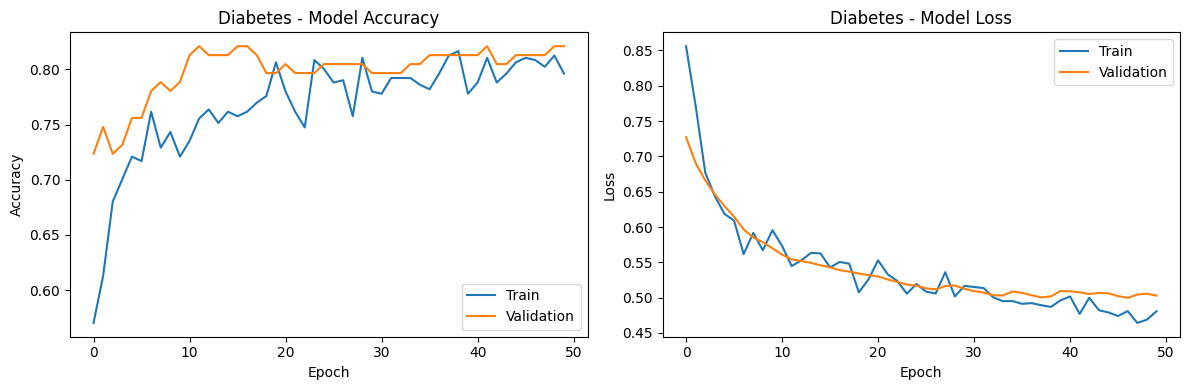


2. Training Logistic Regression...
Logistic Regression Accuracy: 0.7143
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.82      0.79       100
           1       0.61      0.52      0.56        54

    accuracy                           0.71       154
   macro avg       0.68      0.67      0.67       154
weighted avg       0.71      0.71      0.71       154


3. Training Random Forest...
Random Forest Accuracy: 0.7597
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.85      0.82       100
           1       0.68      0.59      0.63        54

    accuracy                           0.76       154
   macro avg       0.74      0.72      0.73       154
weighted avg       0.75      0.76      0.76       154



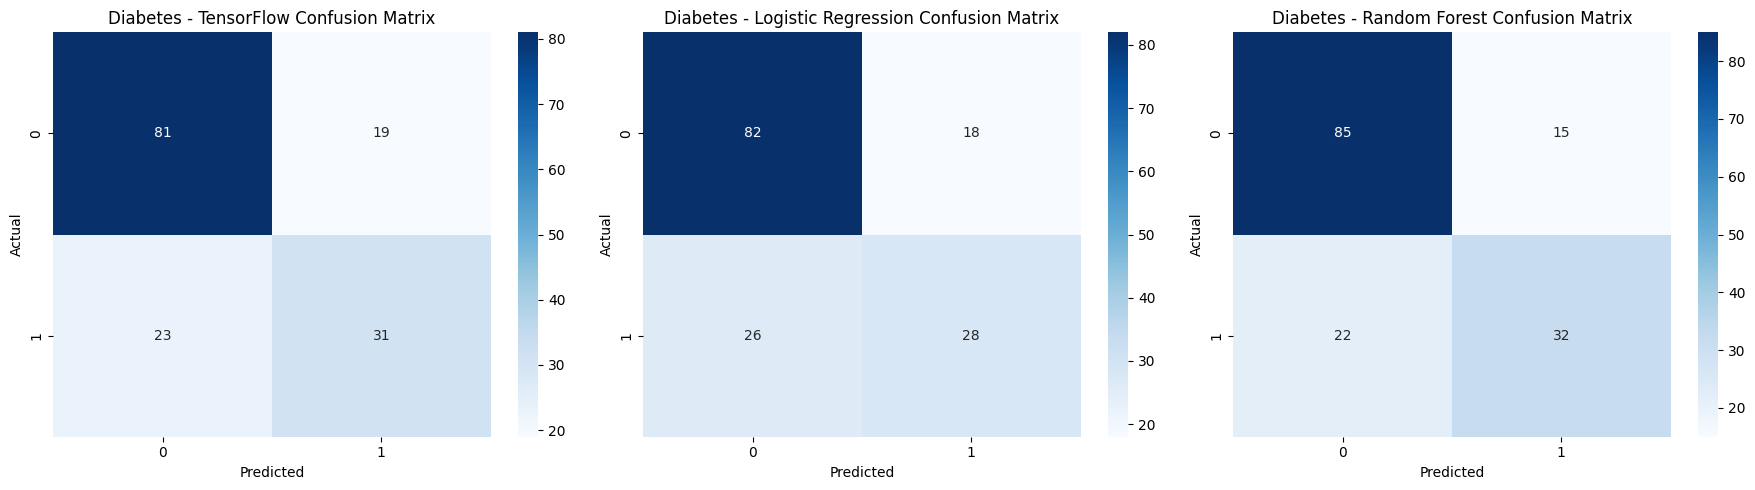


Saving models for Diabetes...
TensorFlow model saved to models/diabetes_tensorflow_model.keras
Logistic Regression model saved to models/diabetes_logistic_regression_model.pkl
Random Forest model saved to models/diabetes_random_forest_model.pkl
Scaler saved to models/diabetes_scaler.pkl


In [187]:
print("\n\n" + "="*50)
print("Processing Diabetes Dataset")
print("="*50)

# Prepare data
X_diabetes, y_diabetes = prepare_dataset(diabetes_df, "Outcome")

# Train and evaluate models
diabetes_results, diabetes_models = train_evaluate_models(X_diabetes, y_diabetes, "Diabetes")

# Save models
save_models(diabetes_models, "Diabetes")

## Part 6: Process Heart Disease Dataset



Processing Heart Disease Dataset

Preparing dataset...
Final feature matrix shape: (303, 13)

Training and Evaluating Models for Heart Disease Dataset
Training set: (242, 13), Test set: (61, 13)

1. Training TensorFlow Neural Network...
TensorFlow model architecture:


C:\Users\0x4C3DD\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_40"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_155 (Dense)               │ (None, 64)             │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_75          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_75 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_156 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_76          │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_76 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_157 (Dense)               │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_158 (Dense)               │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,905 (15.25 KB)

 Trainable params: 3,713 (14.50 KB)

 Non-trainable params: 192 (768.00 B)

Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - accuracy: 0.5798 - loss: 0.8271 - val_accuracy: 0.5714 - val_loss: 0.7572
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5946 - loss: 0.7634 - val_accuracy: 0.6122 - val_loss: 0.7256
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6162 - loss: 0.7265 - val_accuracy: 0.7755 - val_loss: 0.6981
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6589 - loss: 0.6819 - val_accuracy: 0.7959 - val_loss: 0.6719
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6780 - loss: 0.6498 - val_accuracy: 0.7959 - val_loss: 0.6484
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6699 - loss: 0.6613 - val_accuracy: 0.8367 - val_loss: 0.6280
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7589 - loss: 0.5912 - val_accuracy: 0.8367 - val_loss: 0.6085
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7505 - loss: 0.5840 - val_accuracy: 0.8163 - val_loss: 0.5896


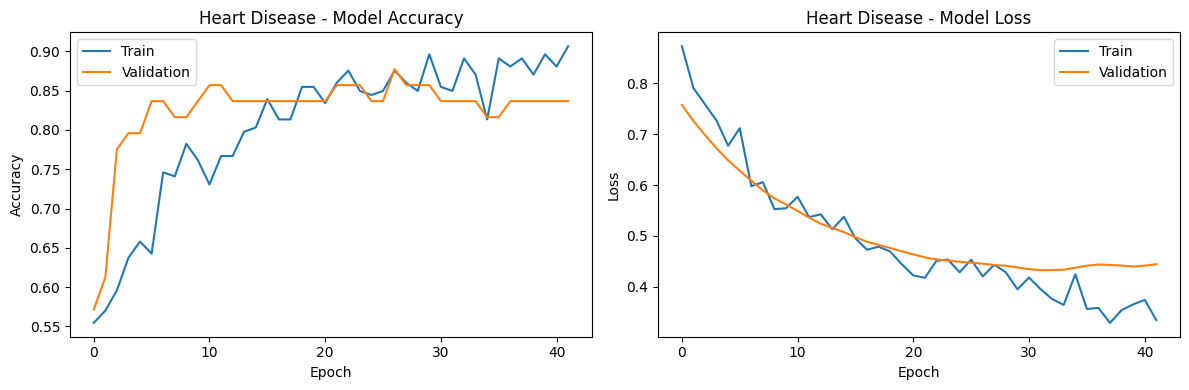


2. Training Logistic Regression...
Logistic Regression Accuracy: 0.8033
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.68      0.76        28
           1       0.77      0.91      0.83        33

    accuracy                           0.80        61
   macro avg       0.82      0.79      0.80        61
weighted avg       0.81      0.80      0.80        61


3. Training Random Forest...
Random Forest Accuracy: 0.8361
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.68      0.79        28
           1       0.78      0.97      0.86        33

    accuracy                           0.84        61
   macro avg       0.87      0.82      0.83        61
weighted avg       0.86      0.84      0.83        61



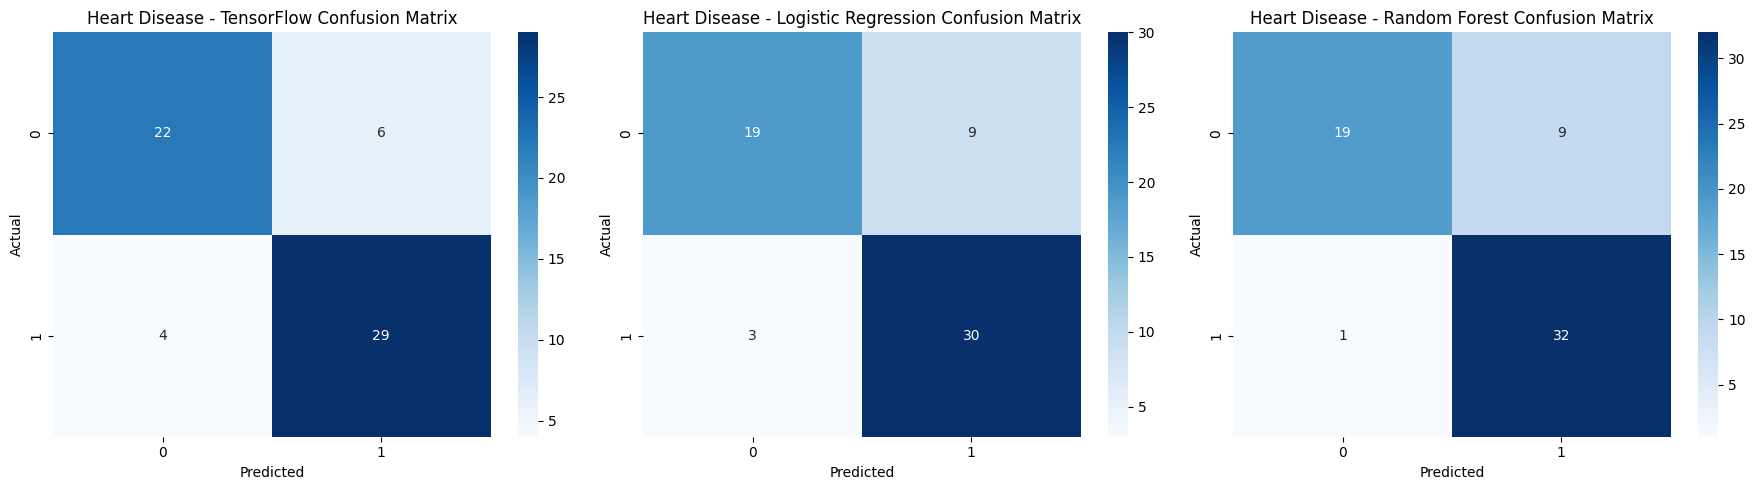


Saving models for Heart Disease...
TensorFlow model saved to models/heart_disease_tensorflow_model.keras
Logistic Regression model saved to models/heart_disease_logistic_regression_model.pkl
Random Forest model saved to models/heart_disease_random_forest_model.pkl
Scaler saved to models/heart_disease_scaler.pkl


In [188]:
print("\n\n" + "="*50)
print("Processing Heart Disease Dataset")
print("="*50)

# Prepare data
X_heart, y_heart = prepare_dataset(heart_df, "target")

# Train and evaluate models
heart_results, heart_models = train_evaluate_models(X_heart, y_heart, "Heart Disease")

# Save models
save_models(heart_models, "Heart Disease")

## Part 7: Process Hypothyroid Dataset




Processing Hypothyroid Dataset
Original thyroid dataset shape: (114, 30)
Target encoding: {'N': 0, 'P': 1, nan: 2}
Cleaned thyroid dataset shape: (114, 29)
Data types after cleaning: float64    29
Name: count, dtype: int64
Target class distribution: Counter({np.int64(1): 105, np.int64(0): 8, np.int64(2): 1})
NaN values in X_train_scaled: 0
NaN values in X_test_scaled: 0
Training set: (91, 29), Test set: (23, 29)

1. Training TensorFlow Neural Network for Hypothyroid...
Epoch 1/30


C:\Users\0x4C3DD\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\lib\_nanfunctions_impl.py:1231: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\0x4C3DD\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\lib\_nanfunctions_impl.py:1231: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\0x4C3DD\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\lib\_nanfunctions_impl.py:1231: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\0x4C3DD\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarn

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 258ms/step - accuracy: 0.3027 - loss: 1.1237 - val_accuracy: 0.6316 - val_loss: 0.6683
Epoch 2/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.5475 - loss: 0.7309 - val_accuracy: 0.7895 - val_loss: 0.6039
Epoch 3/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.6962 - loss: 0.5898 - val_accuracy: 0.7895 - val_loss: 0.5544
Epoch 4/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.7882 - loss: 0.4855 - val_accuracy: 0.8947 - val_loss: 0.5104
Epoch 5/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.8027 - loss: 0.4633 - val_accuracy: 0.8947 - val_loss: 0.4714
Epoch 6/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.8553 - loss: 0.3721 - val_accuracy: 0.8947 - val_loss: 0.4328
Epoch 7/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.8843 - loss: 0.3234 - val_accuracy: 0.8947 - val_loss: 0.3971
Epoch 8/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.9421 - loss: 0.2584 - val_accuracy: 0.8947 - val_loss: 0.3646
Epoch 9/30

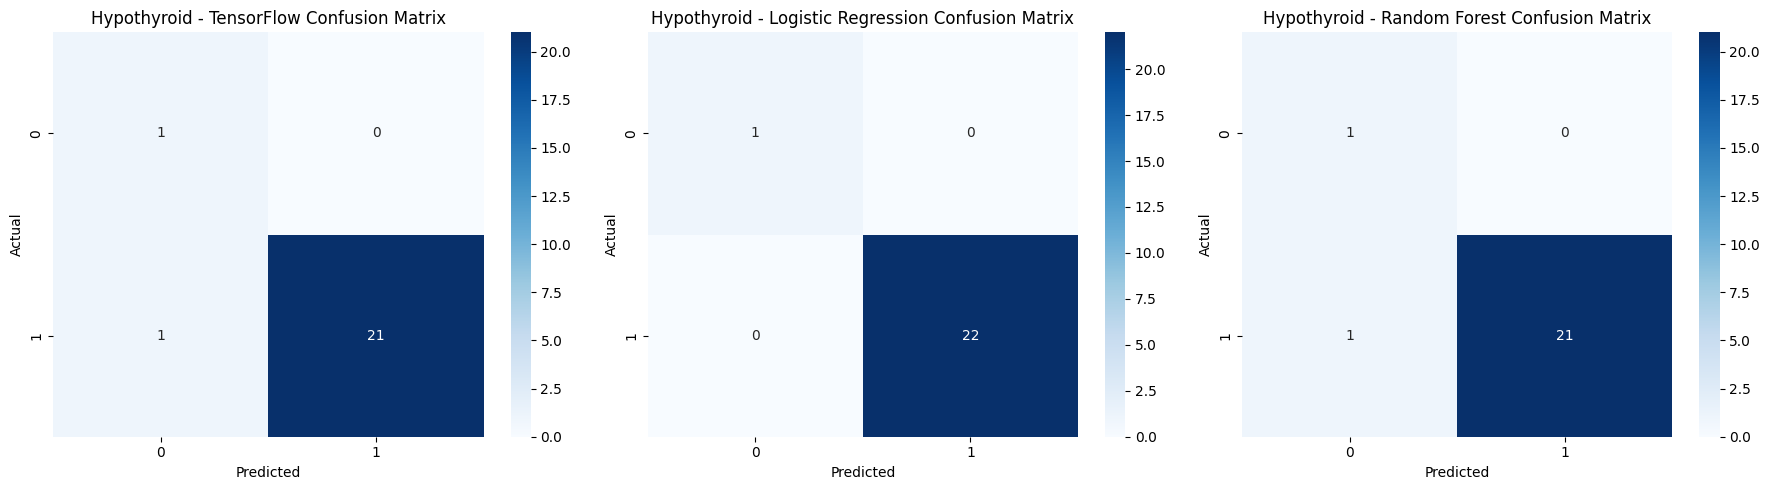


Saving models and artifacts...
Saved: models/hypothyroid_tensorflow_model.keras
Saved: models/hypothyroid_logistic_regression_model.pkl
Saved: models/hypothyroid_random_forest_model.pkl
Saved: models/hypothyroid_scaler.pkl
Saved: models/hypothyroid_label_encoder.pkl
Saved: models/hypothyroid_feature_names.pkl
Sample preprocessed input saved to datasets/hypothyroid_preprocessed_sample.csv

Hypothyroid dataset processing complete!


In [ ]:
print("\n\n" + "="*50)
print("Processing Hypothyroid Dataset")
print("="*50)

# Load raw data
thyroid_df = pd.read_csv('datasets/hypothyroid.csv')
print(f"Original thyroid dataset shape: {thyroid_df.shape}")

# Make a copy to avoid modifying the original
thyroid_clean = thyroid_df.copy()

# One-step replacement of missing values and conversion to numeric
# Replace missing values represented as strings
thyroid_clean = thyroid_clean.replace(['?', 'nan', 'NaN', ''], np.nan)

# Extract and encode target before preprocessing features
le = LabelEncoder()
target = le.fit_transform(thyroid_clean['binaryClass'])
print(f"Target encoding: {dict(zip(le.classes_, range(len(le.classes_))))}")

# Drop target column from features
thyroid_clean = thyroid_clean.drop('binaryClass', axis=1)

# Combine binary and numeric conversion in one step
# Process all columns appropriately
for col in thyroid_clean.columns:
    if thyroid_clean[col].dtype == 'object':
        # For binary columns (t/f), convert to numeric
        if set(thyroid_clean[col].dropna().unique()).issubset({'t', 'f'}):
            thyroid_clean[col] = thyroid_clean[col].map({'t': 1, 'f': 0})
        else:
            # For other columns, try numeric conversion
            thyroid_clean[col] = pd.to_numeric(thyroid_clean[col], errors='coerce')

# Fill missing values in one step using dictionary comprehension
numeric_cols = thyroid_clean.select_dtypes(include=['float64', 'int64']).columns
fill_dict = {col: thyroid_clean[col].median() for col in numeric_cols}
thyroid_clean = thyroid_clean.fillna(fill_dict)

# Make remaining columns numeric and fill any remaining NaNs with 0
thyroid_clean = thyroid_clean.fillna(0).astype(float)

print(f"Cleaned thyroid dataset shape: {thyroid_clean.shape}")
print(f"Data types after cleaning: {thyroid_clean.dtypes.value_counts()}")

# Check class distribution before splitting
from collections import Counter
print(f"Target class distribution: {Counter(target)}")

# Split data without stratification
X_train, X_test, y_train, y_test = train_test_split(
    thyroid_clean, target, test_size=0.2, random_state=42
)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Only use imputer if needed (check for NaNs first)
nan_count_train = np.isnan(X_train_scaled).sum()
nan_count_test = np.isnan(X_test_scaled).sum()
print(f"NaN values in X_train_scaled: {nan_count_train}")
print(f"NaN values in X_test_scaled: {nan_count_test}")

if nan_count_train > 0 or nan_count_test > 0:
    # Use SimpleImputer only if we have NaNs
    imputer = SimpleImputer(strategy='median')
    X_train_scaled = imputer.fit_transform(X_train_scaled)
    X_test_scaled = imputer.transform(X_test_scaled)
    print(f"After imputation - NaN values in X_train_scaled: {np.isnan(X_train_scaled).sum()}")
    print(f"After imputation - NaN values in X_test_scaled: {np.isnan(X_test_scaled).sum()}")

print(f"Training set: {X_train_scaled.shape}, Test set: {X_test_scaled.shape}")

# Reduced number of neurons and simplified architecture
print("\n1. Training TensorFlow Neural Network for Hypothyroid...")
tf_model = keras.Sequential([
    layers.Dense(48, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(24, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

tf_model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.005),  # Faster learning rate
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Early stopping with reduced patience
early_stop = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,  # Reduced patience
    restore_best_weights=True
)

# Train model with reduced epochs
history = tf_model.fit(
    X_train_scaled, y_train,
    epochs=30,  # Reduced epochs
    batch_size=64,  # Larger batch size
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)

# Evaluate TF model
tf_loss, tf_accuracy = tf_model.evaluate(X_test_scaled, y_test, verbose=0)
y_pred_tf = (tf_model.predict(X_test_scaled) > 0.5).astype(int).flatten()
print(f"TensorFlow Model Accuracy: {tf_accuracy:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_tf))

# 2. Logistic Regression 
print("\n2. Training Logistic Regression for Hypothyroid...")
lr_model = LogisticRegression(max_iter=500, random_state=42)  # Reduced max_iter
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)
lr_accuracy = accuracy_score(y_test, y_pred_lr)
print(f"Logistic Regression Accuracy: {lr_accuracy:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_lr))

# 3. Random Forest with optimized parameters
print("\n3. Training Random Forest for Hypothyroid...")
rf_model = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42)  # Limited depth and trees
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Plot confusion matrices
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
models = ["TensorFlow", "Logistic Regression", "Random Forest"]
predictions = [y_pred_tf, y_pred_lr, y_pred_rf]

for i, (model_name, y_pred) in enumerate(zip(models, predictions)):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i])
    axes[i].set_title(f'Hypothyroid - {model_name} Confusion Matrix')
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('Actual')

plt.tight_layout()
plt.show()

# Store results for comparison
thyroid_results = {
    "tensorflow": {"accuracy": tf_accuracy},
    "logistic_regression": {"accuracy": lr_accuracy},
    "random_forest": {"accuracy": rf_accuracy}
}

# Create models directory once
os.makedirs("models", exist_ok=True)

# Corrected feature names first and create mapping of models
feature_names = list(thyroid_clean.columns)
corrected_feature_names = [f"feature_{i}" for i in range(X_test_scaled.shape[1])]

# Create model artifacts dictionary
artifacts = {
    "hypothyroid_tensorflow_model.keras": tf_model,
    "hypothyroid_logistic_regression_model.pkl": lr_model,
    "hypothyroid_random_forest_model.pkl": rf_model,
    "hypothyroid_scaler.pkl": scaler,
    "hypothyroid_label_encoder.pkl": le,
    "hypothyroid_feature_names.pkl": corrected_feature_names
}

# Save all models and artifacts in one batch
print("\nSaving models and artifacts...")
for filename, artifact in artifacts.items():
    if filename.endswith(".keras"):
        artifact.save(f"models/{filename}")
    else:
        with open(f"models/{filename}", 'wb') as f:
            pickle.dump(artifact, f)
    print(f"Saved: models/{filename}")

# Save preprocessed sample for reference (consistent path in models directory)
sample_df = pd.DataFrame(X_test_scaled[:5], columns=corrected_feature_names)
sample_path = "datasets/hypothyroid_preprocessed_sample.csv"
sample_df.to_csv(sample_path, index=False)
print(f"Sample preprocessed input saved to {sample_path}")

# Create final models dictionary for compatibility with other code
thyroid_models = {
    "tensorflow": tf_model,
    "logistic_regression": lr_model,
    "random_forest": rf_model,
    "scaler": scaler,
    "label_encoder": le,
    "feature_names": corrected_feature_names
}

print("\nHypothyroid dataset processing complete!")

## Part 8: Process Parkinson's Dataset



Processing Parkinson's Dataset

Preparing dataset...
Dropped columns: ['name']
Final feature matrix shape: (195, 22)

Training and Evaluating Models for Parkinson's Dataset
Training set: (156, 22), Test set: (39, 22)

1. Training TensorFlow Neural Network...
TensorFlow model architecture:


C:\Users\0x4C3DD\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_42"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_162 (Dense)               │ (None, 64)             │         1,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_78          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_78 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_163 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_79          │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_79 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_164 (Dense)               │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_165 (Dense)               │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,481 (17.50 KB)

 Trainable params: 4,289 (16.75 KB)

 Non-trainable params: 192 (768.00 B)

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 97ms/step - accuracy: 0.6895 - loss: 0.7193 - val_accuracy: 0.8125 - val_loss: 0.6729
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.7052 - loss: 0.6832 - val_accuracy: 0.8125 - val_loss: 0.6631
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7019 - loss: 0.6650 - val_accuracy: 0.8125 - val_loss: 0.6548
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.7155 - loss: 0.6582 - val_accuracy: 0.8750 - val_loss: 0.6449
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.7124 - loss: 0.5761 - val_accuracy: 0.8750 - val_loss: 0.6364
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.7546 - loss: 0.5915 - val_accuracy: 0.8438 - val_loss: 0.6253
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.7663 - loss: 0.5800 - val_accuracy: 0.8125 - val_loss: 0.6140
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7779 - loss: 0.5398 - val_accuracy: 0.8125 - val_loss: 0.6027


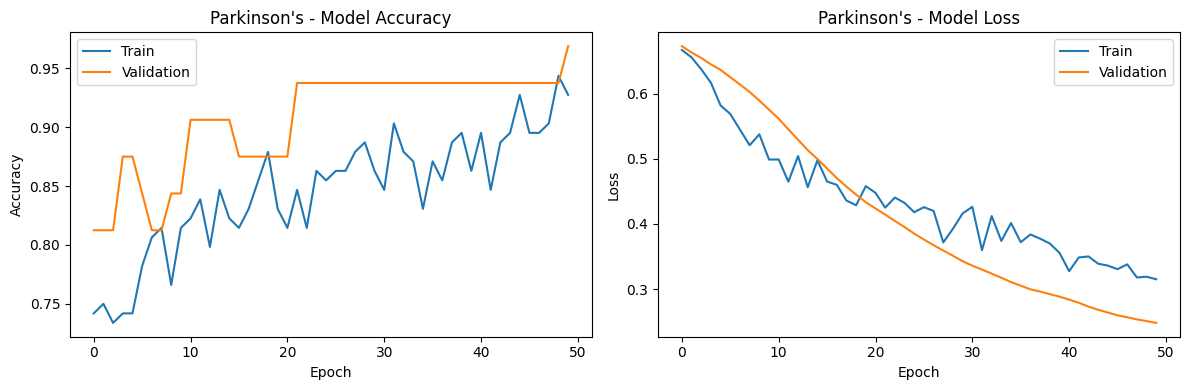


2. Training Logistic Regression...
Logistic Regression Accuracy: 0.9231
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.80      0.84        10
           1       0.93      0.97      0.95        29

    accuracy                           0.92        39
   macro avg       0.91      0.88      0.90        39
weighted avg       0.92      0.92      0.92        39


3. Training Random Forest...
Random Forest Accuracy: 0.9231
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.80      0.84        10
           1       0.93      0.97      0.95        29

    accuracy                           0.92        39
   macro avg       0.91      0.88      0.90        39
weighted avg       0.92      0.92      0.92        39



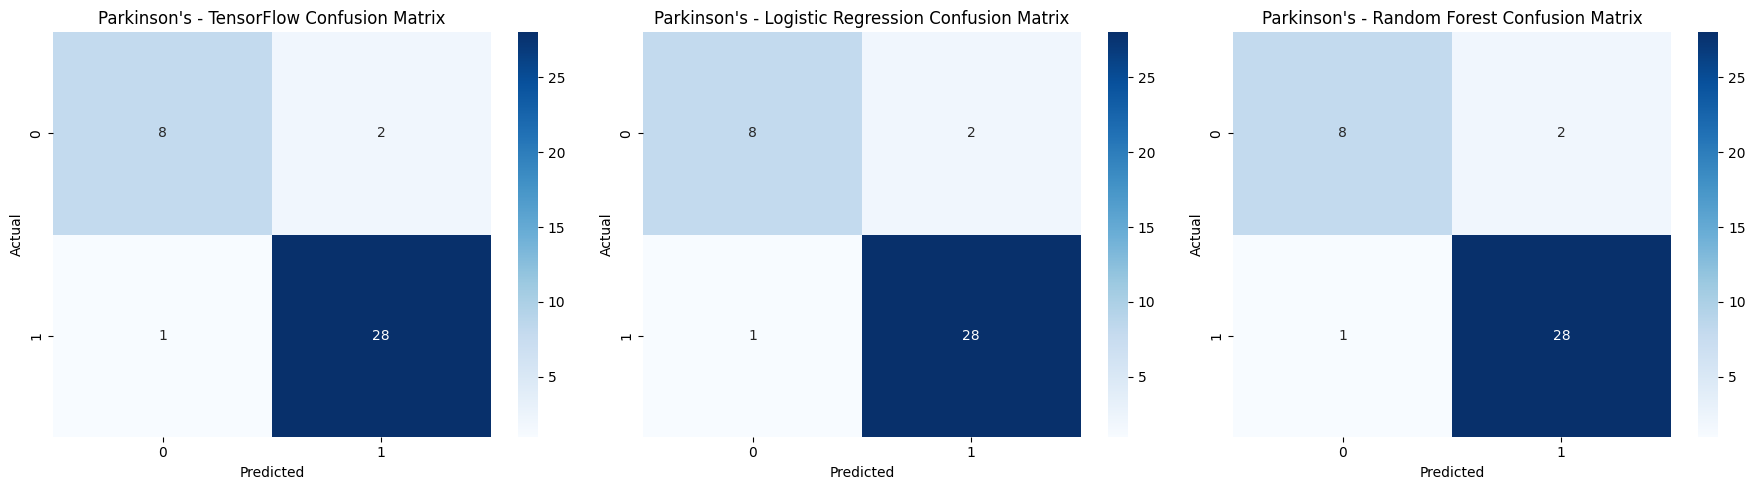


Saving models for Parkinson's...
TensorFlow model saved to models/parkinsons_tensorflow_model.keras
Logistic Regression model saved to models/parkinsons_logistic_regression_model.pkl
Random Forest model saved to models/parkinsons_random_forest_model.pkl
Scaler saved to models/parkinsons_scaler.pkl


In [190]:
print("\n\n" + "="*50)
print("Processing Parkinson's Dataset")
print("="*50)

# Prepare data
# For Parkinson's dataset, drop the 'name' column
X_parkinson, y_parkinson = prepare_dataset(parkinson_df, "status", drop_cols=["name"])

# Train and evaluate models
parkinson_results, parkinson_models = train_evaluate_models(X_parkinson, y_parkinson, "Parkinson's")

# Save models
save_models(parkinson_models, "Parkinson's")

## Part 9: Process Lung Cancer Dataset



Processing Lung Cancer Dataset

Preparing dataset...
Encoded target classes: {'NO': np.int64(0), 'YES': np.int64(1)}
Final feature matrix shape: (309, 15)

Training and Evaluating Models for Lung Cancer Dataset
Training set: (247, 15), Test set: (62, 15)

1. Training TensorFlow Neural Network...
TensorFlow model architecture:


C:\Users\0x4C3DD\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_43"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_166 (Dense)               │ (None, 64)             │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_80          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_80 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_167 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_81          │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_81 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_168 (Dense)               │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_169 (Dense)               │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,033 (15.75 KB)

 Trainable params: 3,841 (15.00 KB)

 Non-trainable params: 192 (768.00 B)

Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.3433 - loss: 1.1680 - val_accuracy: 0.6200 - val_loss: 0.7498
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4310 - loss: 0.9754 - val_accuracy: 0.6800 - val_loss: 0.7190
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.4644 - loss: 0.9176 - val_accuracy: 0.7200 - val_loss: 0.6932
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4612 - loss: 0.8966 - val_accuracy: 0.7200 - val_loss: 0.6679
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6007 - loss: 0.7229 - val_accuracy: 0.7400 - val_loss: 0.6472
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6390 - loss: 0.6903 - val_accuracy: 0.8600 - val_loss: 0.6280
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6974 - loss: 0.6499 - val_accuracy: 0.8400 - val_loss: 0.6097
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6880 - loss: 0.5946 - val_accuracy: 0.8600 - val_loss: 0.5919


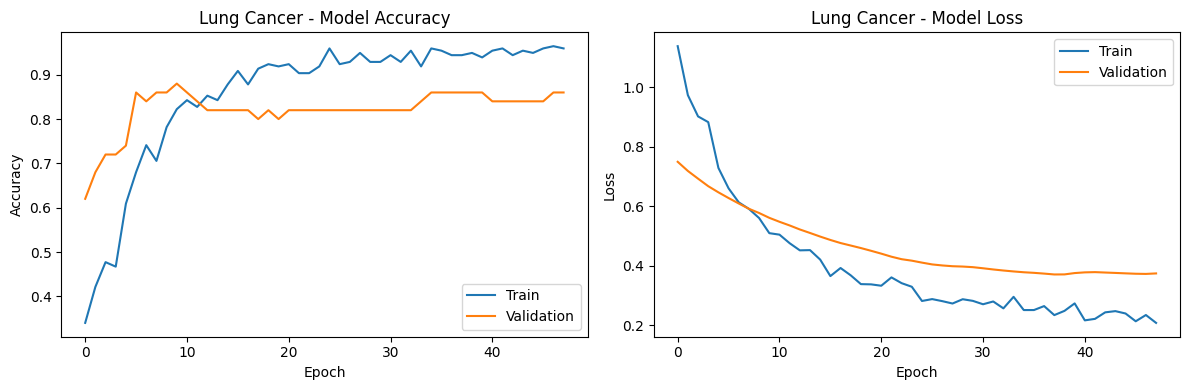


2. Training Logistic Regression...
Logistic Regression Accuracy: 0.9032
Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.62      0.62         8
           1       0.94      0.94      0.94        54

    accuracy                           0.90        62
   macro avg       0.78      0.78      0.78        62
weighted avg       0.90      0.90      0.90        62


3. Training Random Forest...
Random Forest Accuracy: 0.9194
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.75      0.71         8
           1       0.96      0.94      0.95        54

    accuracy                           0.92        62
   macro avg       0.81      0.85      0.83        62
weighted avg       0.92      0.92      0.92        62



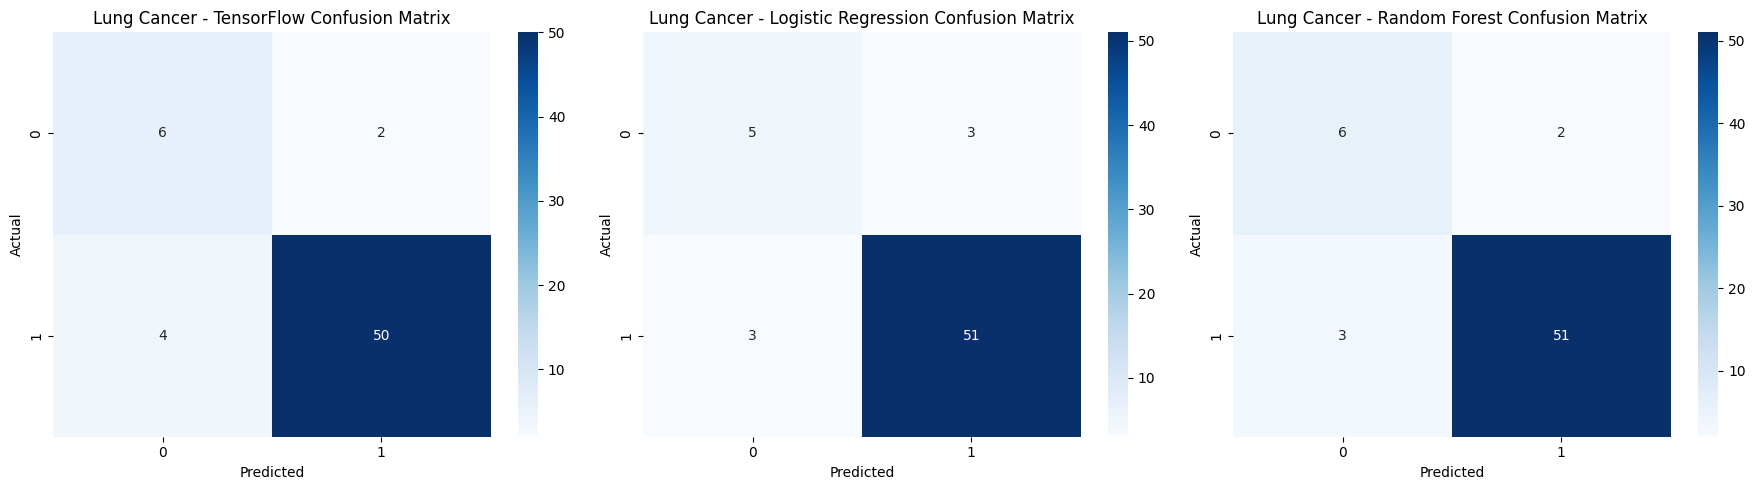


Saving models for Lung Cancer...
TensorFlow model saved to models/lung_cancer_tensorflow_model.keras
Logistic Regression model saved to models/lung_cancer_logistic_regression_model.pkl
Random Forest model saved to models/lung_cancer_random_forest_model.pkl
Scaler saved to models/lung_cancer_scaler.pkl


In [191]:
print("\n\n" + "="*50)
print("Processing Lung Cancer Dataset")
print("="*50)

# Prepare data
X_lung, y_lung = prepare_dataset(lung_df, "LUNG_CANCER")

# Train and evaluate models
lung_results, lung_models = train_evaluate_models(X_lung, y_lung, "Lung Cancer")

# Save models
save_models(lung_models, "Lung Cancer")

## Part 10: Compare Model Performance

Let's compare our models across all datasets to draw insights.



Model Performance Comparison


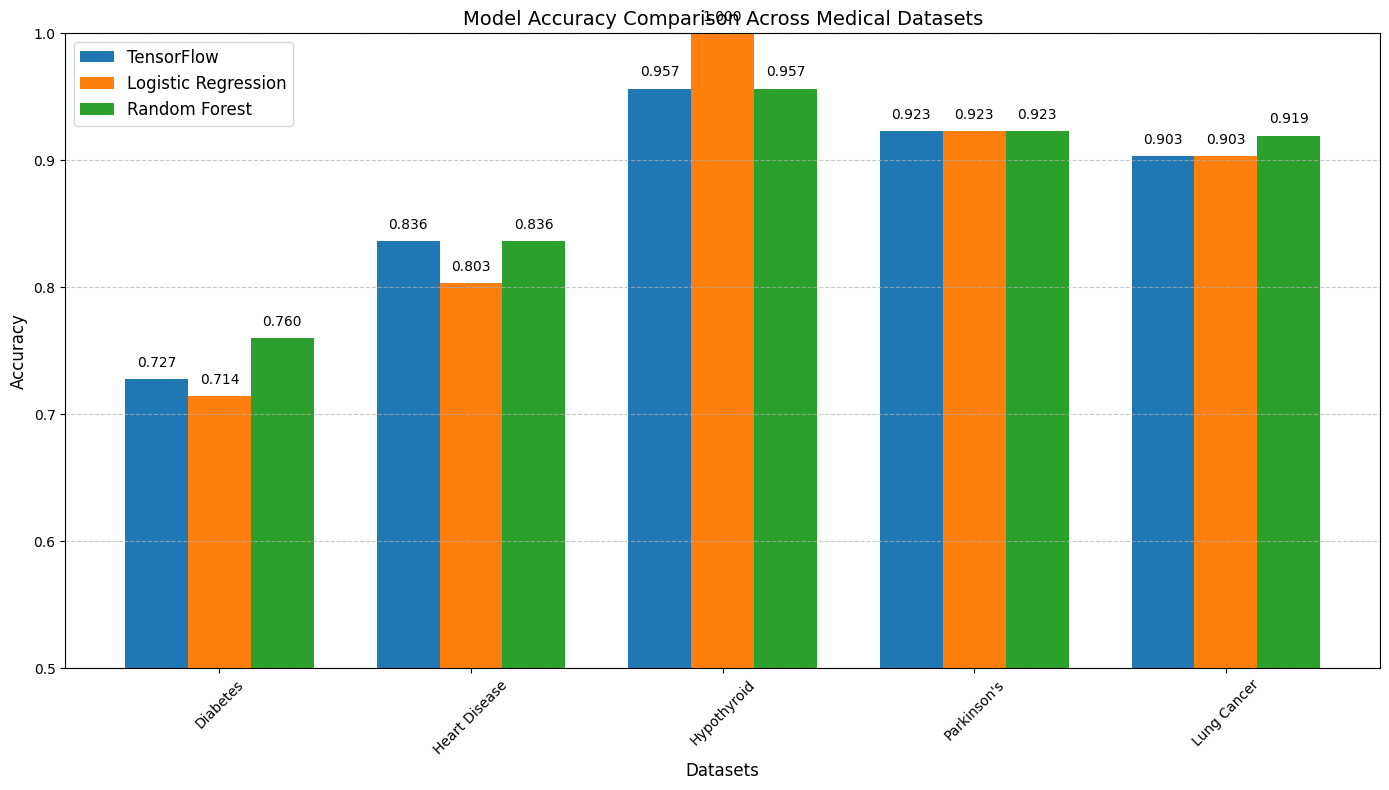


Summary of Model Accuracies:
Dataset         TensorFlow      Logistic Regression  Random Forest   Best Model     
Diabetes        0.7273           0.7143                0.7597           Random Forest  
Heart Disease   0.8361           0.8033                0.8361           TensorFlow     
Hypothyroid     0.9565           1.0000                0.9565           Logistic Regression
Parkinson's     0.9231           0.9231                0.9231           TensorFlow     
Lung Cancer     0.9032           0.9032                0.9194           Random Forest  


In [192]:
# Compare model performances across datasets
print("\n\n" + "="*50)
print("Model Performance Comparison")
print("="*50)

datasets = ["Diabetes", "Heart Disease", "Hypothyroid", "Parkinson's", "Lung Cancer"]
models = ["TensorFlow", "Logistic Regression", "Random Forest"]
all_results = [diabetes_results, heart_results, thyroid_results, parkinson_results, lung_results]

# Extract accuracies
accuracies = {
    "TensorFlow": [],
    "Logistic Regression": [],
    "Random Forest": []
}

for result in all_results:
    accuracies["TensorFlow"].append(result["tensorflow"]["accuracy"])
    accuracies["Logistic Regression"].append(result["logistic_regression"]["accuracy"])
    accuracies["Random Forest"].append(result["random_forest"]["accuracy"])

# Plot comparison
plt.figure(figsize=(14, 8))
x = np.arange(len(datasets))
width = 0.25

plt.bar(x - width, accuracies["TensorFlow"], width, label='TensorFlow')
plt.bar(x, accuracies["Logistic Regression"], width, label='Logistic Regression')
plt.bar(x + width, accuracies["Random Forest"], width, label='Random Forest')

plt.xlabel('Datasets', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Model Accuracy Comparison Across Medical Datasets', fontsize=14)
plt.xticks(x, datasets, rotation=45)
plt.legend(fontsize=12)
plt.ylim(0.5, 1.0)  # Setting y-axis limits for better visualization

for i, model in enumerate(["TensorFlow", "Logistic Regression", "Random Forest"]):
    for j, acc in enumerate(accuracies[model]):
        plt.text(j + (i-1)*width, acc + 0.01, f'{acc:.3f}', ha='center', fontsize=10)

plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Print summary table
print("\nSummary of Model Accuracies:")
print("="*80)
print(f"{'Dataset':<15} {'TensorFlow':<15} {'Logistic Regression':<20} {'Random Forest':<15} {'Best Model':<15}")
print("="*80)
for i, dataset in enumerate(datasets):
    tf_acc = accuracies['TensorFlow'][i]
    lr_acc = accuracies['Logistic Regression'][i]
    rf_acc = accuracies['Random Forest'][i]
    best_idx = np.argmax([tf_acc, lr_acc, rf_acc])
    best_model = models[best_idx]
    print(f"{dataset:<15} {tf_acc:.4f}{' ':<10} {lr_acc:.4f}{' ':<15} {rf_acc:.4f}{' ':<10} {best_model:<15}")

In [193]:
print("\n\nCleaning models directory - keeping only the best models...")

# Create mapping of dataset to best model type
best_models_map = {}
for i, dataset in enumerate(datasets):
    tf_acc = accuracies['TensorFlow'][i]
    lr_acc = accuracies['Logistic Regression'][i]
    rf_acc = accuracies['Random Forest'][i]
    best_idx = np.argmax([tf_acc, lr_acc, rf_acc])
    best_model_type = models[best_idx].lower().replace(' ', '_')
    best_models_map[dataset.lower().replace(' ', '_').replace("'", "")] = best_model_type
    
# Get list of all files in the models directory
model_files = os.listdir("models")

# Keep track of which files to delete
files_to_delete = []

# Check each file
for file in model_files:
    # Skip non-model files
    if not (file.endswith('.keras') or file.endswith('.pkl')):
        continue
        
    # Get dataset name from file
    parts = file.split('_')
    if len(parts) >= 2:
        dataset_name = parts[0]
        
        # Handle special case for 'heart_disease'
        if dataset_name == 'heart':
            dataset_name = 'heart_disease'
            
        # Check if this is a model file (not scaler/encoder/feature_names)
        if any(model_type in file for model_type in ['tensorflow', 'logistic_regression', 'random_forest']):
            # If it's not the best model for this dataset, add to delete list
            best_model_type = best_models_map.get(dataset_name)
            if best_model_type and best_model_type not in file:
                files_to_delete.append(file)

# Delete the files
for file in files_to_delete:
    file_path = os.path.join("models", file)
    try:
        os.remove(file_path)
        print(f"Deleted: {file}")
    except Exception as e:
        print(f"Error deleting {file}: {e}")
        
print(f"\nCleanup complete! Deleted {len(files_to_delete)} non-optimal model files.")
print("Kept models: ")
for dataset, model_type in best_models_map.items():
    print(f"  - {dataset}: {model_type}")



Cleaning models directory - keeping only the best models...
Deleted: diabetes_logistic_regression_model.pkl
Deleted: diabetes_tensorflow_model.keras
Deleted: heart_disease_logistic_regression_model.pkl
Deleted: heart_disease_random_forest_model.pkl
Deleted: hypothyroid_random_forest_model.pkl
Deleted: hypothyroid_tensorflow_model.keras
Deleted: parkinsons_logistic_regression_model.pkl
Deleted: parkinsons_random_forest_model.pkl

Cleanup complete! Deleted 8 non-optimal model files.
Kept models: 
  - diabetes: random_forest
  - heart_disease: tensorflow
  - hypothyroid: logistic_regression
  - parkinsons: tensorflow
  - lung_cancer: random_forest
